In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/circle_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
circles = pd.read_csv(file_content_stream)
circles.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,x,y
0,0.421362,0.161185
1,-0.385647,0.449012
2,0.425654,-0.100170
3,-0.574566,0.741009
4,-0.255552,0.572340


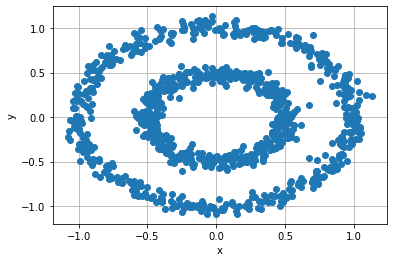

In [5]:
## Let's visualize the data 
plt.plot(circles['x'], circles['y'], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [6]:
## Changing the scale 
scaler = MinMaxScaler()

circles[['x_0_1', 'y_0_1']] = scaler.fit_transform(circles)
circles.head()

,x,y,x_0_1,y_0_1
0,0.421362,0.161185,0.677955,0.562456
1,-0.385647,0.449012,0.313458,0.692048
2,0.425654,-0.100170,0.679893,0.444782
3,-0.574566,0.741009,0.228130,0.823518
4,-0.255552,0.572340,0.372217,0.747576


In [7]:
## Running spectral clustering (clusters = 2) 
spectral_clustering = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', n_neighbors = 20).fit(circles[['x_0_1', 'y_0_1']])

## Appending the cluster labels 
circles['spectral_cluster'] = spectral_clustering.labels_
circles.head(10)

,x,y,x_0_1,y_0_1,spectral_cluster
0,0.421362,0.161185,0.677955,0.562456,0
1,-0.385647,0.449012,0.313458,0.692048,0
2,0.425654,-0.100170,0.679893,0.444782,0
3,-0.574566,0.741009,0.228130,0.823518,1
4,-0.255552,0.572340,0.372217,0.747576,0
5,0.214523,-0.500648,0.584533,0.264470,0
6,0.893340,0.266634,0.891130,0.609934,1
7,0.931335,0.179790,0.908291,0.570833,1
8,0.855901,-0.520083,0.874220,0.255720,1
9,-0.635288,-0.712810,0.200704,0.168945,1


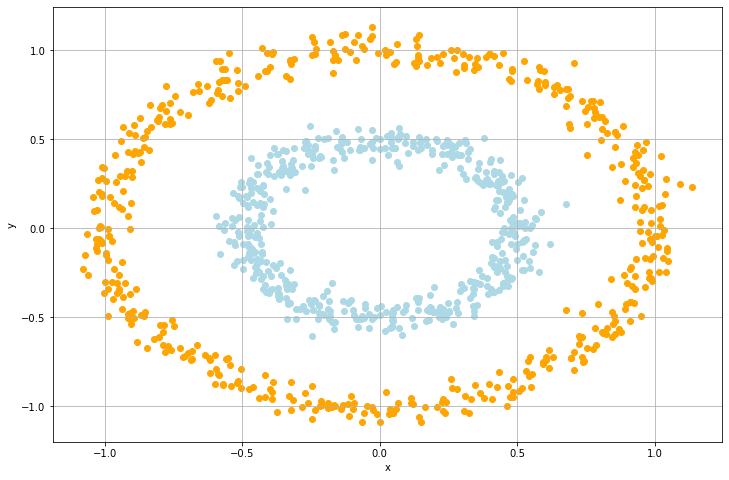

In [8]:
## Visualizing the spectral clustering results
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

for i in circles['spectral_cluster'].unique():
    
    temp = circles[circles['spectral_cluster'] == i]
    plt.scatter(temp['x'], temp['y'], color = colors[i])